1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6438266038894653 | D accuracy: 72.65625] [G loss: [array(0.6604426, dtype=float32), array(0.6604426, dtype=float32), array(0.578125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


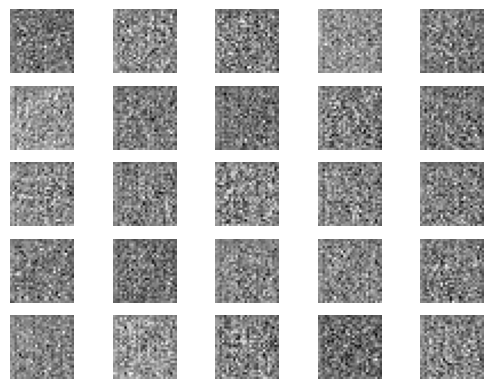

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1 [D loss: 0.6545417308807373 | D accuracy: 62.23958730697632] [G loss: [array(0.6602283, dtype=float32), array(0.6602283, dtype=float32), array(0.546875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2 [D loss: 0.6587063074111938 | D accuracy: 57.8125] [G loss: [array(0.66202193, dtype=float32), array(0.66202193, dtype=float32), array(0.53125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3 [D loss: 0.6582057476043701 | D accuracy: 56.41741156578064] [G loss: [array(0.6606605, dtype=float32), array(0.6606605, dtype=float32), array(0.5390625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4 [D loss: 0.6605682373046875 | D accuracy: 54.58333492279053] [G loss: [array(0.66250914, dtype=float32), array(0.66250914, dtype=float32), array(0.51875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
5 [D loss: 0.6617544889450073 | D accuracy: 52.40293741226196] [G loss: [array(0.66334194, dtype=float32), array(0.66334194, dtype=float32), array(0.5026042, dtype=flo

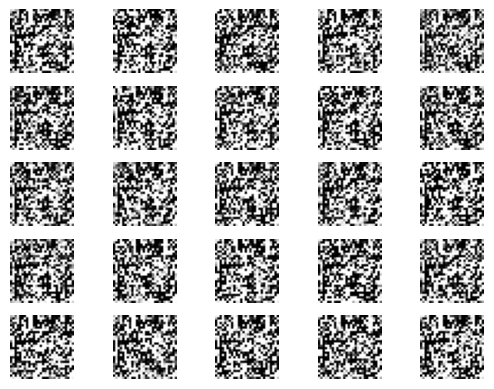

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
501 [D loss: 1.078561782836914 | D accuracy: 44.369715452194214] [G loss: [array(1.0789639, dtype=float32), array(1.0789639, dtype=float32), array(0.44347608, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
502 [D loss: 1.0789138078689575 | D accuracy: 44.37469840049744] [G loss: [array(1.0793116, dtype=float32), array(1.0793116, dtype=float32), array(0.44352633, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
503 [D loss: 1.0792750120162964 | D accuracy: 44.36415433883667] [G loss: [array(1.0796695, dtype=float32), array(1.0796695, dtype=float32), array(0.4434214, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
504 [D loss: 1.0796115398406982 | D accuracy: 44.37222480773926] [G loss: [array(1.0800077, dtype=float32), array(1.0800077, dtype=float32), array(0.4435025, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
505 [D loss: 1.079958200454712 | D accuracy: 44.36481595039368] [G loss: [array(1.0803442, dtype=float32), a

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, LeakyReLU, Conv2DTranspose, Conv2D, Flatten, Dropout, Input
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset and preprocess
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0  # Normalize to [-1, 1]
X_train = np.expand_dims(X_train, axis=-1)  # Reshape to add channel dimension

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(128 * 7 * 7))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(1, kernel_size=3, padding='same', activation='tanh'))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
z = Input(shape=(100,))
generated_img = generator(z)
valid = discriminator(generated_img)
gan = Model(z, valid)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

# Function to display generated images
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    count = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

# Training function
def train(epochs, batch_size=128, save_interval=50):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        gen_imgs = generator.predict(noise)

        # Discriminator loss on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_y)

        # Print progress
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

        # Save generated images at intervals
        if epoch % save_interval == 0:
            save_imgs(epoch)

# Train the GAN for a specified number of epochs
train(epochs=5000, batch_size=64, save_interval=500)
